In [1]:
import scipy as sp
import scipy.stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
plt.rc("font", size=10, family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 결합엔트로피

**결합엔트로피(joint entropy)**는 결합확률분포를 사용하여 정의한 엔트로피를 말한다.

이산확률변수 X, Y에 대해 결합엔트로피는 다음처럼 정의한다.



$$H[X,Y]=-\displaystyle\sum_{i=1}^{k_x} \displaystyle\sum_{j=1}^{k_y}p(x_i,y_j)log_2p(x_i,y_j)$$

이 식에서 KX, KY는 각각 X와 Y가 가질 수 있는 값의 개수고 p는 확률질량함수다.

연속확률변수 X, Y에 대해 결합엔트로피는 다음처럼 정의한다.

$$H[X,Y]=−\int_{x}\int_{y}p(x,y)log_2p(x,y)dxdy$$

이 식에서 p는 확률밀도함수다.

결합엔트로피도 결합확률분포라는 점만 제외하면 일반적인 엔트로피와 같다. 모든 경우에 대해 골고루 확률이 분포되어 있으면 엔트로피값이 커지고 특정한 한 가지 경우에 대해 확률이 모여있으면 엔트로피가 0에 가까와진다.

# 조건부엔트로피

**조건부엔트로피(conditional entropy)**는 어떤 확률변수 X가 다른 확률변수 Y의 값을 예측하는데 도움이 되는지를 측정하는 방법 중의 하나다. 만약 확률변수 X의 값이 어떤 특정한 하나의 값을 가질 때 확률변수 Y도 마찬가지로 특정한 값이 된다면 X로 Y를 예측할 수 있다. 반대로 확률변수 X의 값이 어떤 특정한 하나의 값을 가져도 확률변수 Y가 여러 값으로 골고루 분포되어 있다면 X는 Y의 값을 예측하는데 도움이 안된다.

조건부엔트로피의 정의는 다음과 같이 유도한다. 확률변수 X, Y가 모두 이산확률변수라고 가정하고 X가 특정한 값 $x_i$를 가질 때의 Y의 엔트로피 $H[Y∣X=x_i]$는 다음처럼 조건부확률분포의 엔트로피로 정의한다.

$$H[Y∣X=x_i]=−\displaystyle\sum_{j=1}^{k_y}p(y_j∣x_i)log_2p(y_j∣x_i)$$

조건부엔트로피의 최종적인 수학적 정의는 다음과 같다.

이산확률변수의 경우에는 다음처럼 정의한다.

$$H[Y∣X]=−\displaystyle\sum_{i=1}^{k_x} \displaystyle\sum_{j=1}^{k_y}p(x_i,y_j)log_2p(y_i|x_i)$$

연속확률변수의 경우에는 다음처럼 정의한다.

$$H[Y|X]=−\int_{x}\int_{y}p(x,y)log_2p(y|x)dxdy$$

# 예측에 도움이 되는 경우

예를 들어 X, Y 값의 관계가 다음과 같다고 하자.

구분|Y=0 |Y=1
----|----|-----
X=0 | 0.4|0.0
X=1 | 0.0|0.6


X=0,X=1 일 때의 조건부확률분포는 다음과 같다.

$$P(Y=0|X=0)=1,P(Y=1|X=0)=0$$

$$P(Y=0|X=1)=0,P(Y=1|X=1)=1$$

이때 Y의 엔트로피는 모두 0이다.

$$H[Y∣X=0]=0$$

$$H[Y∣X=1]=0$$

따라서 조건부엔트로피도 0이 된다.

$$H[Y|X]=0$$

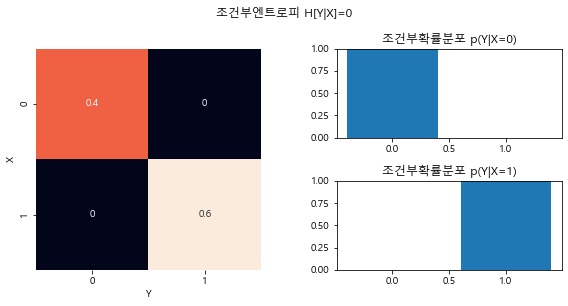

In [8]:
plt.figure(figsize=(8, 4))
ax1 = plt.subplot(121)
pXY = [[0.4, 0], [0, 0.6]]
sns.heatmap(pXY, annot=True, cbar=False)
plt.xlabel("Y")
plt.ylabel("X")

plt.subplot(222)
plt.bar([0, 1], [1, 0])
plt.ylim(0, 1)
plt.title("조건부확률분포 p(Y|X=0)")

plt.subplot(224)
plt.bar([0, 1], [0, 1])
plt.ylim(0, 1)
plt.title("조건부확률분포 p(Y|X=1)")

plt.tight_layout(w_pad=5)
plt.suptitle("조건부엔트로피 H[Y|X]=0", y=1.05)
plt.show()

# 예측에 도움이 되지 않는 경우

예를 들어 두 확률변수 X, Y 값의 관계가 다음과 같다고 하자. 이 경우 두 확률변수는 서로 독립이다.

구분|Y=0 |Y=1
----|----|-----
X=0 | ${1 \over 9}$|${2 \over 9}$
X=1 | ${2 \over 9}$|${4 \over 9}$


X=0,X=1일 때의 조건부확률분포는 다음과 같다.

$$P(Y=0|X=0)={1\over3},P(Y=1|X=0)={2\over3}$$

$$P(Y=0|X=1)={1\over3},P(Y=1|X=1)={2\over3}$$

두 경우 모두 Y의 엔트로피는 약 0.92다.

$$H[Y∣X=0]=H[Y∣X=1]=−{1\over3}log_2{1\over3}−{2\over3}log_2{2\over3}≈0.92$$

In [10]:
sp.stats.entropy([1/3, 2/3], base=2)

0.9182958340544894

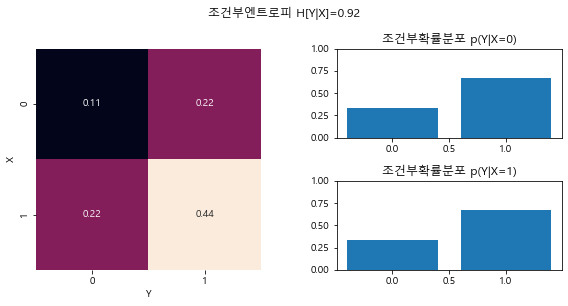

In [11]:
plt.figure(figsize=(8, 4))
ax1 = plt.subplot(121)
pXY = [[1/9, 2/9], [2/9, 4/9]]
sns.heatmap(pXY, annot=True, cbar=False)
plt.xlabel("Y")
plt.ylabel("X")

plt.subplot(222)
plt.bar([0, 1], [1/3, 2/3])
plt.ylim(0, 1)
plt.title("조건부확률분포 p(Y|X=0)")

plt.subplot(224)
plt.bar([0, 1], [1/3, 2/3])
plt.ylim(0, 1)
plt.title("조건부확률분포 p(Y|X=1)")

plt.tight_layout(w_pad=5)
plt.suptitle("조건부엔트로피 H[Y|X]=0.92", y=1.05)
plt.show()